# Série de Fourier d'un créneau

In [1]:
import numpy as np
import matplotlib.pyplot as plt

On considère le signal créneau $y(t)$ de période $2T$ défini par :

$$
y(t) =
\begin{cases}
  A  \quad  &\text{si}\ -\frac{T}{2} \leq t \leq \frac{T}{2}, \\
  0  \quad  &\text{sinon}
\end{cases}
$$

avec $A=1$ et $T = 1$.

Sa série de Fourier est égale à :

$$
Y[k] = \frac{A}{2} \mathrm{sinc}\left(\frac{k}{2}\right).
$$

Comme elle est à valeurs complexes, sa représentation est séparée en module et argument :

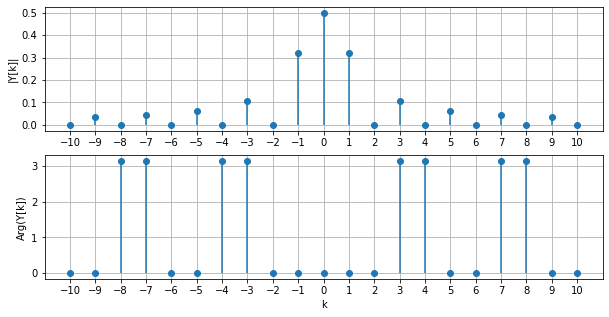

In [2]:
A = 1
T = 1
k = np.arange(-10,11)
Y = A/2 * np.sinc(k/2)

plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.stem(k, np.abs(Y), basefmt=" ")
plt.xticks(k)
plt.ylabel("|Y[k]|")
plt.grid()
plt.subplot(2,1,2)
plt.stem(k,np.angle(Y), basefmt=" ")
plt.xlabel("k")
plt.xticks(k)
plt.ylabel("Arg(Y[k])")
plt.grid()
plt.show()

À partir de la série de Fourier, on peut revenir au signal temporel avec la série de Fourier inverse.

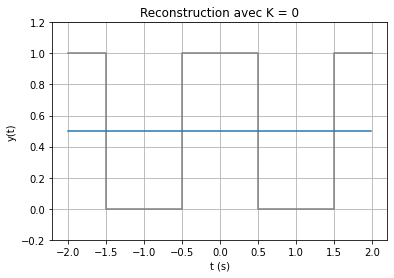

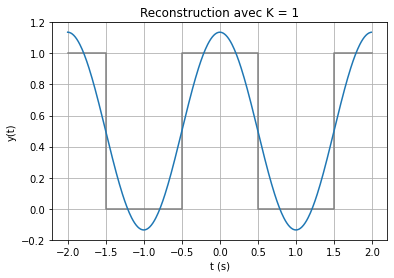

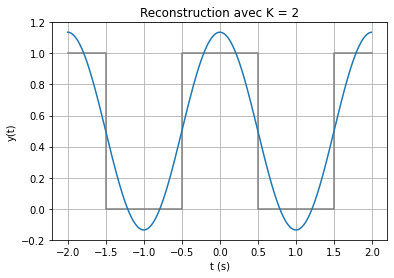

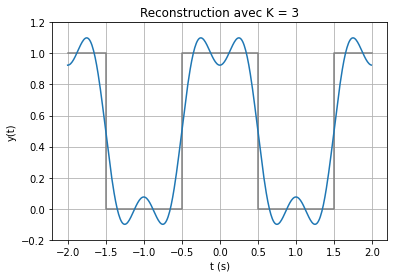

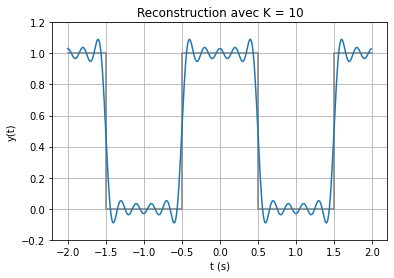

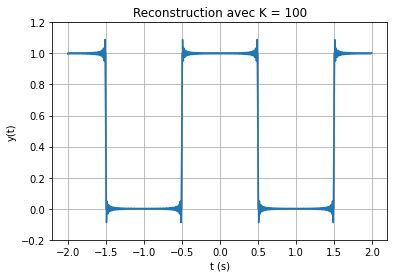

In [3]:
# Reconstruction et phénomène de Gibbs

t = np.arange(-2, 2, .01)
N = 101

for k in range(N):
    
    # Rajoute les composantes symétriques
    if k == 0:
        y = A/2 * np.ones(t.shape)
    else:
        y = y + A/2 * np.sinc(k/2)  * np.exp(+1j*2*np.pi*k*t/(2*T)) \
              + A/2 * np.sinc(-k/2) * np.exp(-1j*2*np.pi*k*t/(2*T))
    
    # Affiche le résultat pour certaines valeurs de k
    if k in [0, 1, 2, 3, 10, 100]:
        fig = plt.figure(figsize=(6,4))
        plt.plot([-2, -3*T/2, -3*T/2, -T/2, -T/2, T/2, T/2, 3*T/2, 3*T/2, 2], [1, 1, 0, 0, 1, 1, 0, 0, 1, 1], color="gray")
        plt.plot(t,np.real(y))
        plt.xlabel("t (s)")
        plt.ylabel("y(t)")
        plt.ylim([-.2, 1.2])
        plt.grid()
        plt.title(f"Reconstruction avec K = {k}")

On observe que lorsque $N$ augmente, la reconstruction tend vers le créneau.
Cependant, des oscillations apparaissent aux discontinuités du signal et ne peuvent s'annuler, même si $N$ est très grand :
c'est le phénomène de Gibbs.
Le phénomène disparaît seulement pour $N \rightarrow +\infty$